In [1]:
from jupyterthemes import jtplot
jtplot.style(context='notebook', theme='onedork', figsize=(15,5))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [8]:
all_data = pd.read_csv("hyg_stars.csv")
all_data.head()

,id,proper,con,sptype,absmag,ci,lum
0,3072,NaN,Phe,K,-12.190,1.367,6.546362e+06
1,3073,NaN,Tuc,K,0.206,1.244,7.204436e+01
2,3074,NaN,Cas,A,2.713,0.404,7.158137e+00
3,3075,NaN,Phe,K,-0.475,1.176,1.348963e+02
4,3076,NaN,Cet,B,2.584,0.238,8.061206e+00


In [9]:
all_data.describe()

,id,absmag,ci,lum
count,114653.000000,114653.000000,114653.000000,1.146530e+05
mean,59338.481313,0.864994,0.703285,3.590977e+05
std,34251.138983,4.139357,0.486430,3.375591e+06
min,0.000000,-16.680000,-0.400000,5.566728e-06
25%,29654.000000,0.127000,0.342000,5.355500e+00
50%,59361.000000,1.437000,0.607000,2.318462e+01
75%,89023.000000,3.028000,1.078000,7.748185e+01
max,119613.000000,17.986000,3.315000,4.092607e+08


In [10]:
all_data['sptype'] = all_data['sptype'].map({'O': 0, 'B': 1, 'A': 2, 'F': 3, 'G': 4, 'K': 5, 'M': 6})
all_data.head()

,id,proper,con,sptype,absmag,ci,lum
0,3072,NaN,Phe,5,-12.190,1.367,6.546362e+06
1,3073,NaN,Tuc,5,0.206,1.244,7.204436e+01
2,3074,NaN,Cas,2,2.713,0.404,7.158137e+00
3,3075,NaN,Phe,5,-0.475,1.176,1.348963e+02
4,3076,NaN,Cet,1,2.584,0.238,8.061206e+00


In [20]:
stars = {
    'sptype' : all_data['sptype'],
    'vmag' : all_data['absmag'],
    'bv' : all_data['ci'],
    'lum' : all_data['lum'],
}
stars = pd.DataFrame.from_dict(stars)
stars.head()

,sptype,vmag,bv,lum
0,5,-12.190,1.367,6.546362e+06
1,5,0.206,1.244,7.204436e+01
2,2,2.713,0.404,7.158137e+00
3,5,-0.475,1.176,1.348963e+02
4,1,2.584,0.238,8.061206e+00


# Vizualize data

Tipul spectral:

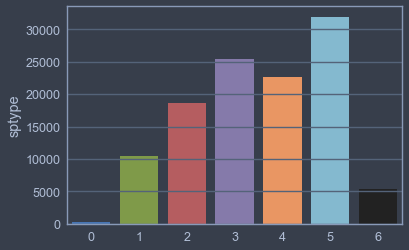

In [11]:
spectral_types = pd.DataFrame(all_data["sptype"].value_counts().sort_values(ascending=False))
ax = sns.barplot(x = spectral_types.index, y = 'sptype' , data = spectral_types)

Extrem de putine stele cu tipul spectral O (This might be a problem!)

<AxesSubplot:>

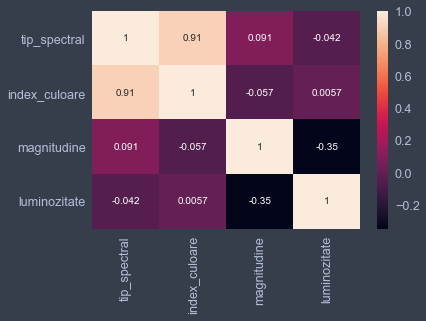

In [12]:
star_data = {
    'tip_spectral' : all_data['sptype'],
    'index_culoare' : all_data['ci'],
    'magnitudine' : all_data['absmag'],
    'luminozitate' : all_data['lum']
}
star_data = pd.DataFrame.from_dict(star_data)
star_data['tip_spectral'] = star_data['tip_spectral'].astype('category').cat.codes
corr_matrix = star_data.corr()
sns.heatmap(corr_matrix, annot=True)

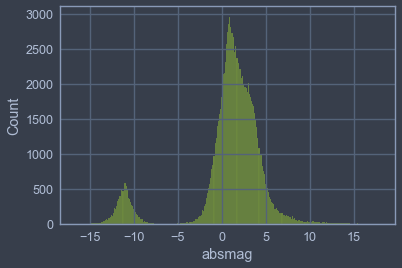

In [13]:
vmag = sns.histplot(all_data, x="absmag", color="g")

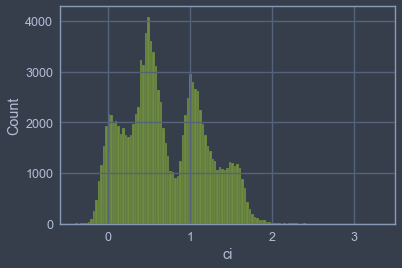

In [14]:
bv = sns.histplot(all_data, x="ci", color="g")

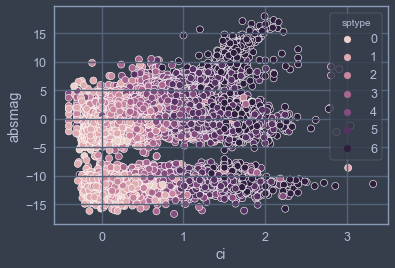

In [16]:
g1 = sns.scatterplot(data=all_data, x='ci', y='absmag', hue='sptype')

## Verificam existenta outliers

<AxesSubplot:xlabel='sptype', ylabel='absmag'>

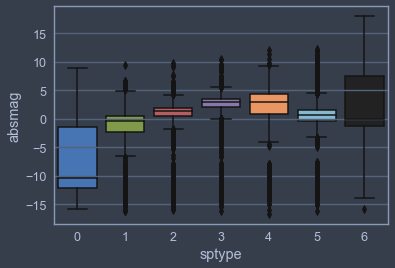

In [17]:
sns.boxplot(x=all_data['sptype'], y=all_data['absmag'])

<AxesSubplot:xlabel='sptype', ylabel='ci'>

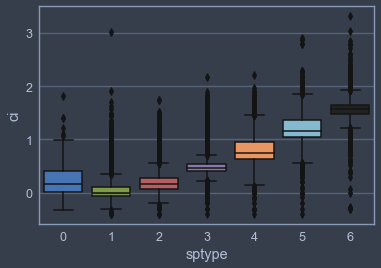

In [18]:
sns.boxplot(x=all_data['sptype'], y=all_data['ci'])

<AxesSubplot:xlabel='sptype', ylabel='lum'>

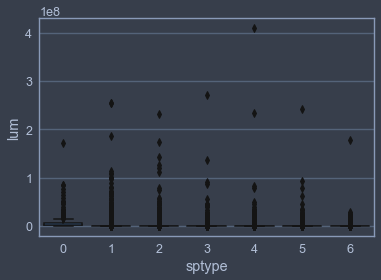

In [19]:
sns.boxplot(x=all_data['sptype'], y=all_data['lum'])

Mulți outliers

# Data Preprocessing

In [21]:
stars.dtypes

sptype      int64
vmag      float64
bv        float64
lum       float64
dtype: object

In [22]:
stars['sptype'] = stars['sptype'].astype(float)
stars1 = stars.copy()
stars1.head()

,sptype,vmag,bv,lum
0,5.0,-12.190,1.367,6.546362e+06
1,5.0,0.206,1.244,7.204436e+01
2,2.0,2.713,0.404,7.158137e+00
3,5.0,-0.475,1.176,1.348963e+02
4,1.0,2.584,0.238,8.061206e+00


### Data Scaling

>NoScaler

In [23]:
X_train, X_test, y_train, y_test = train_test_split(stars.drop(['sptype'],axis=1), stars['sptype'], test_size=0.20)
print("X_train shape is", X_train.shape)
print("X_test shape is", X_test.shape)
print("y_train shape is", y_train.shape)
print("y_test shape is", y_test.shape)

X_train shape is (91722, 3)
X_test shape is (22931, 3)
y_train shape is (91722,)
y_test shape is (22931,)


#### LogisticRegression

In [21]:
logreg = LogisticRegression(max_iter=100000)
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

print(classification_report(y_test, predictions, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.59      0.30      0.40       373
         2.0       0.74      0.79      0.76      1832
         3.0       0.76      0.81      0.78      3231
         4.0       0.70      0.66      0.67      2637
         5.0       0.81      0.83      0.82      2550
         6.0       0.78      0.59      0.67       175

    accuracy                           0.75     10798
   macro avg       0.73      0.66      0.69     10798
weighted avg       0.75      0.75      0.75     10798



C:\Users\Lucian\.conda\envs\R\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### RandomForest

In [24]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        48
         1.0       0.66      0.63      0.65      2026
         2.0       0.73      0.73      0.73      3730
         3.0       0.78      0.81      0.79      5150
         4.0       0.66      0.63      0.64      4457
         5.0       0.76      0.81      0.79      6412
         6.0       0.59      0.48      0.53      1108

    accuracy                           0.73     22931
   macro avg       0.60      0.58      0.59     22931
weighted avg       0.72      0.73      0.72     22931



#### Gaussian Naive Bayes

In [25]:
gnc = GaussianNB()
gnc.fit(X_train,y_train)

pred_gnc = gnc.predict(X_test)
print(classification_report(y_test, pred_gnc, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.12      0.10      0.11        48
         1.0       0.45      0.04      0.07      2026
         2.0       0.00      0.00      0.00      3730
         3.0       0.04      0.00      0.00      5150
         4.0       0.09      0.01      0.01      4457
         5.0       0.28      0.97      0.43      6412
         6.0       0.00      0.00      0.00      1108

    accuracy                           0.28     22931
   macro avg       0.14      0.16      0.09     22931
weighted avg       0.14      0.28      0.13     22931



#### Support Vector Classifier 

In [ ]:
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)

pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc, zero_division=0))

#### DecisionTreeClassifier

In [ ]:
accuracy_scores = []
max_depths = []

for max_depth in range(1, 15):
    model = DecisionTreeClassifier(max_depth = max_depth)
    model.fit(X_train, y_train)

    test_prediction = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_prediction)

    max_depths.append(max_depth)
    accuracy_scores.append(test_accuracy)

ax = sns.lineplot(x = max_depths, y = accuracy_scores)
ax.set(xlabel='Decision Tree Max Depth', ylabel='Accuracy Score')
print(f'Best accuracy score |{max(accuracy_scores)}| achieved at max depth |{np.argmax(accuracy_scores) + 1}|')

>MinMax Scaler

In [87]:
scaler = MinMaxScaler()

stars1['vmag'] = scaler.fit_transform(np.expand_dims(stars1['vmag'], axis=1))
stars1['bv'] = scaler.fit_transform(np.expand_dims(stars1['bv'], axis=1))
stars1['lum'] = scaler.fit_transform(np.expand_dims(stars1['lum'], axis=1))

stars1.head()

,hip,sptype,vmag,bv,temp,rad
0,89954,2.0,0.385027,0.249,0.154542,0.004239
1,86572,2.0,0.409820,0.149,0.171268,0.005276
2,87144,2.0,0.469616,0.135,0.187930,0.002241
3,87760,2.0,0.468644,0.279,0.144306,0.002921
4,87482,2.0,0.493923,0.281,0.135361,0.003177


In [88]:
X_train, X_test, y_train, y_test = train_test_split(stars1.drop(['hip','sptype'],axis=1), stars1['sptype'], test_size=0.20)
print("X_train shape is", X_train.shape)
print("X_test shape is", X_test.shape)
print("y_train shape is", y_train.shape)
print("y_test shape is", y_test.shape)

X_train shape is (43191, 4)
X_test shape is (10798, 4)
y_train shape is (43191,)
y_test shape is (10798,)


#### LogisticRegression

In [89]:
s_logreg = LogisticRegression(max_iter=1000000)
s_logreg.fit(X_train, y_train)
s_pred_lreg = s_logreg.predict(X_test)

print(classification_report(y_test, s_pred_lreg, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.81      0.38      0.52       357
         2.0       0.83      0.87      0.85      1818
         3.0       0.84      0.90      0.87      3227
         4.0       0.79      0.73      0.76      2638
         5.0       0.82      0.87      0.85      2574
         6.0       0.80      0.39      0.52       184

    accuracy                           0.82     10798
   macro avg       0.82      0.69      0.73     10798
weighted avg       0.82      0.82      0.82     10798



#### RandomForest

In [90]:
s_rfc = RandomForestClassifier(n_estimators=100)
s_rfc.fit(X_train,y_train)

s_pred_rfc = s_rfc.predict(X_test)
print(classification_report(y_test, s_pred_rfc, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.70      0.61      0.65       357
         2.0       0.85      0.86      0.85      1818
         3.0       0.85      0.89      0.87      3227
         4.0       0.78      0.74      0.76      2638
         5.0       0.83      0.86      0.85      2574
         6.0       0.82      0.67      0.74       184

    accuracy                           0.83     10798
   macro avg       0.81      0.77      0.79     10798
weighted avg       0.82      0.83      0.82     10798



In [91]:
sr_accuracy_scores = []
sr_max_depths = []

for sr_max_depth in range(1, 20):
    sr_rfc = RandomForestClassifier(n_estimators=100, max_depth = sr_max_depth)
    sr_rfc.fit(X_train,y_train)

    sr_pred_rfc = sr_rfc.predict(X_test)
    sr_test_accuracy = accuracy_score(y_test, sr_pred_rfc)

    sr_max_depths.append(sr_max_depth)
    sr_accuracy_scores.append(sr_test_accuracy)

print(f'Best accuracy score |{max(sr_accuracy_scores)}| achieved at max depth |{np.argmax(sr_accuracy_scores) + 1}|')

Best accuracy score |0.8402481941100204| achieved at max depth |8|


[Text(0.5, 0, 'Random Forest Max Depth'), Text(0, 0.5, 'Accuracy Score')]

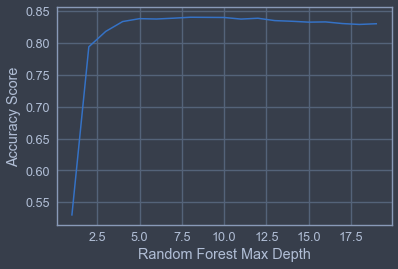

In [92]:
ax = sns.lineplot(x = sr_max_depths, y = sr_accuracy_scores)
ax.set(xlabel='Random Forest Max Depth', ylabel='Accuracy Score')

#### Gaussian Naive Bayes

In [93]:
s_gnc = GaussianNB()
s_gnc.fit(X_train,y_train)

s_pred_gnc = s_gnc.predict(X_test)
print(classification_report(y_test, s_pred_gnc, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.62      0.71      0.66       357
         2.0       0.86      0.81      0.84      1818
         3.0       0.79      0.93      0.85      3227
         4.0       0.76      0.57      0.65      2638
         5.0       0.78      0.79      0.78      2574
         6.0       0.48      0.85      0.61       184

    accuracy                           0.78     10798
   macro avg       0.71      0.78      0.73     10798
weighted avg       0.78      0.78      0.77     10798



#### Support Vector Classifier 

In [96]:
s_svc = SVC(kernel='poly')
s_svc.fit(X_train,y_train)

s_pred_svc = s_svc.predict(X_test)
print(classification_report(y_test, s_pred_svc, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.77      0.49      0.60       357
         2.0       0.83      0.89      0.86      1818
         3.0       0.86      0.90      0.88      3227
         4.0       0.80      0.75      0.78      2638
         5.0       0.85      0.87      0.86      2574
         6.0       0.91      0.64      0.75       184

    accuracy                           0.84     10798
   macro avg       0.84      0.76      0.79     10798
weighted avg       0.84      0.84      0.83     10798



#### DecisionTreeClassifier

Best accuracy score |0.8320059270235228| achieved at max depth |7|


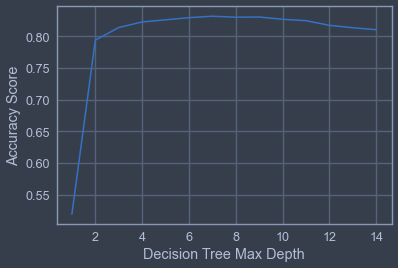

In [97]:
s_accuracy_scores = []
s_max_depths = []

for s_max_depth in range(1, 15):
    s_model = DecisionTreeClassifier(max_depth = s_max_depth)
    s_model.fit(X_train, y_train)

    s_test_prediction = s_model.predict(X_test)
    s_test_accuracy = accuracy_score(y_test, s_test_prediction)

    s_max_depths.append(s_max_depth)
    s_accuracy_scores.append(s_test_accuracy)

ax = sns.lineplot(x = s_max_depths, y = s_accuracy_scores)
ax.set(xlabel='Decision Tree Max Depth', ylabel='Accuracy Score')
print(f'Best accuracy score |{max(s_accuracy_scores)}| achieved at max depth |{np.argmax(s_accuracy_scores) + 1}|')

### Feature Importance

In [98]:
f_imp = pd.Series(s_rfc.feature_importances_,index=X_train.columns.values).sort_values(ascending=False)
f_imp

temp    0.396457
bv      0.373932
rad     0.116425
vmag    0.113186
dtype: float64

## PCA

In [99]:
stars2 = stars.copy()
stars2.head()

,hip,sptype,vmag,bv,temp,rad
0,89954,2.0,0.59,0.249,8017.0,3.051
1,86572,2.0,1.10,0.149,8535.0,3.762
2,87144,2.0,2.33,0.135,9051.0,1.680
3,87760,2.0,2.31,0.279,7700.0,2.147
4,87482,2.0,2.83,0.281,7423.0,2.322


In [100]:
features = stars2.drop(['hip','sptype'], axis = 1)
labels = stars2['sptype']

scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)

Text(0.5, 0, 'Principal Component Number')

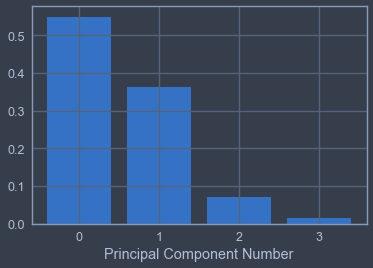

In [101]:
pca = PCA()
pca.fit(scaled_train_features)
explained_var = pca.explained_variance_ratio_

fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), explained_var)
ax.set_xlabel('Principal Component Number')

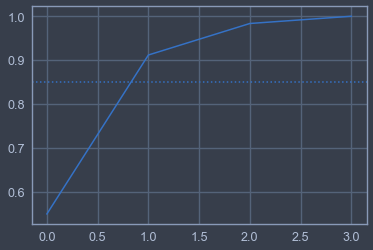

In [102]:
cumulative_exp_var = np.cumsum(explained_var)

fig, ax = plt.subplots()
ax.plot(cumulative_exp_var)
ax.axhline(y=0.85, linestyle=':')

In [104]:
n_component = 1

pca = PCA(n_component)
pca.fit(scaled_train_features)
pca_projection = pca.transform(scaled_train_features)

X_train, X_test, y_train, y_test = train_test_split(stars1.drop(['hip','sptype'],axis=1), stars1['sptype'], test_size=0.20)
print("X_train shape is", X_train.shape)
print("X_test shape is", X_test.shape)
print("y_train shape is", y_train.shape)
print("y_test shape is", y_test.shape)

X_train shape is (43191, 4)
X_test shape is (10798, 4)
y_train shape is (43191,)
y_test shape is (10798,)


#### LogisticRegression

In [105]:
pca_logreg = LogisticRegression(max_iter=1000000)
pca_logreg.fit(X_train, y_train)
pca_pred_lreg = pca_logreg.predict(X_test)

print(classification_report(y_test, pca_pred_lreg, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.87      0.38      0.53       380
         2.0       0.83      0.87      0.85      1856
         3.0       0.84      0.90      0.87      3155
         4.0       0.80      0.75      0.77      2613
         5.0       0.83      0.87      0.85      2608
         6.0       0.74      0.44      0.55       186

    accuracy                           0.83     10798
   macro avg       0.82      0.70      0.74     10798
weighted avg       0.82      0.83      0.82     10798



#### RandomForest

In [106]:
pca_rfc = RandomForestClassifier(n_estimators=100)
pca_rfc.fit(X_train,y_train)

pca_pred_rfc = pca_rfc.predict(X_test)
print(classification_report(y_test, pca_pred_rfc, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.78      0.61      0.69       380
         2.0       0.84      0.88      0.86      1856
         3.0       0.85      0.88      0.87      3155
         4.0       0.79      0.75      0.77      2613
         5.0       0.85      0.87      0.86      2608
         6.0       0.87      0.72      0.78       186

    accuracy                           0.83     10798
   macro avg       0.83      0.79      0.80     10798
weighted avg       0.83      0.83      0.83     10798



In [107]:
pca_accuracy_scores = []
pca_max_depths = []

for pca_max_depth in range(1, 20):
    pca_rfc = RandomForestClassifier(n_estimators=100, max_depth = pca_max_depth)
    pca_rfc.fit(X_train,y_train)

    pca_pred_rfc = pca_rfc.predict(X_test)
    pca_test_accuracy = accuracy_score(y_test, pca_pred_rfc)

    pca_max_depths.append(pca_max_depth)
    pca_accuracy_scores.append(pca_test_accuracy)

print(f'Best accuracy score |{max(pca_accuracy_scores)}| achieved at max depth |{np.argmax(pca_accuracy_scores) + 1}|')

Best accuracy score |0.8445082422670865| achieved at max depth |11|


[Text(0.5, 0, 'Random Forest Max Depth'), Text(0, 0.5, 'Accuracy Score')]

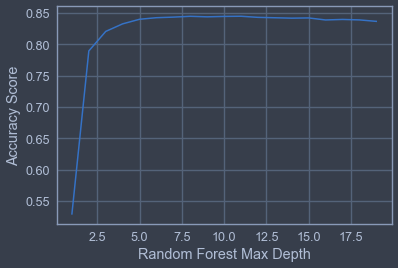

In [108]:
ax = sns.lineplot(x = pca_max_depths, y = pca_accuracy_scores)
ax.set(xlabel='Random Forest Max Depth', ylabel='Accuracy Score')

#### Gaussian Naive Bayes

In [109]:
pca_gnc = GaussianNB()
pca_gnc.fit(X_train,y_train)

pca_pred_gnc = pca_gnc.predict(X_test)
print(classification_report(y_test, pca_pred_gnc, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.66      0.73      0.70       380
         2.0       0.87      0.83      0.85      1856
         3.0       0.80      0.93      0.86      3155
         4.0       0.76      0.59      0.67      2613
         5.0       0.79      0.79      0.79      2608
         6.0       0.50      0.88      0.64       186

    accuracy                           0.79     10798
   macro avg       0.73      0.79      0.75     10798
weighted avg       0.79      0.79      0.78     10798



#### Support Vector Classifier 

In [111]:
pca_svc = SVC(kernel='poly')
pca_svc.fit(X_train,y_train)

pca_pred_svc = pca_svc.predict(X_test)
print(classification_report(y_test, pca_pred_svc, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.84      0.49      0.62       380
         2.0       0.83      0.90      0.86      1856
         3.0       0.86      0.89      0.87      3155
         4.0       0.80      0.77      0.79      2613
         5.0       0.86      0.88      0.87      2608
         6.0       0.90      0.70      0.79       186

    accuracy                           0.84     10798
   macro avg       0.85      0.77      0.80     10798
weighted avg       0.84      0.84      0.84     10798



#### DecisionTreeClassifier

Best accuracy score |0.8394147064271161| achieved at max depth |7|


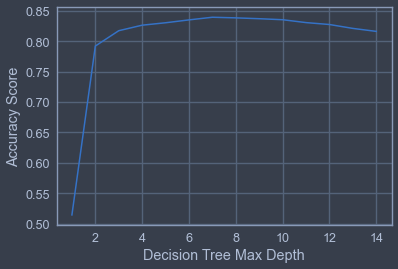

In [112]:
pcad_accuracy_scores = []
pcad_max_depths = []

for pcad_max_depth in range(1, 15):
    pcad_model = DecisionTreeClassifier(max_depth = pcad_max_depth)
    pcad_model.fit(X_train, y_train)

    pcad_test_prediction = pcad_model.predict(X_test)
    pcad_test_accuracy = accuracy_score(y_test, pcad_test_prediction)

    pcad_max_depths.append(pcad_max_depth)
    pcad_accuracy_scores.append(pcad_test_accuracy)

ax = sns.lineplot(x = pcad_max_depths, y = pcad_accuracy_scores)
ax.set(xlabel='Decision Tree Max Depth', ylabel='Accuracy Score')
print(f'Best accuracy score |{max(pcad_accuracy_scores)}| achieved at max depth |{np.argmax(pcad_accuracy_scores) + 1}|')